In [1]:
import numpy as np
import pandas as pd

uploading and exploring the data

In [2]:
Data = pd.read_csv('datasets_738413_1279881_RELIANCE.csv')
Data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [3]:
Data = Data.sort_values('Date')

In [4]:
Data.shape

(5075, 15)

visualise the data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(Data[['Close']])
plt.xticks(range(0,Data.shape[0],500),Data['Date'].loc[::500],rotation=45)
plt.title("RELIANCE Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

<Figure size 1500x900 with 1 Axes>

normalize the data

In [6]:
Data[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5075 entries, 0 to 5074
Data columns (total 1 columns):
Close    5075 non-null float64
dtypes: float64(1)
memory usage: 79.3 KB


In [7]:
from sklearn.preprocessing import MinMaxScaler
price=Data[['Close']]
scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))

C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
price['Close'].tail(3)

5072   -0.176611
5073   -0.158915
5074   -0.164118
Name: Close, dtype: float64

Creating seuquence data for LSTM
to explain the below code:
    data is an empty list that will contain  inner lists each one of the inner list will contain a sequense of price data
    in the lenght of sitted prediction days which is forty 
then splliting the data by factor 0.2 to train and test
the x which is the features data will contain all the elements of the inner lists except the last value of each list which will be the y or the target.
meaning that because each inner list will contain 40 elements x will have all except the last which is 40-1=39 and the y will be the last which is 1

In [9]:
prediction_days=40
Price=price.to_numpy() # convert to numpy array
data = []
    
    
for index in range(len(Price) -prediction_days): 
    data.append(Price[index: index + prediction_days])
    
data = np.array(data);
test_set_size = int(np.round(0.2*data.shape[0]));
train_set_size = data.shape[0] - (test_set_size);

x_train = data[:train_set_size,:-1]
y_train = data[:train_set_size,-1]

x_test = data[train_set_size:,:-1]
y_test = data[train_set_size:,-1]

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (4028, 39, 1)
y_train.shape =  (4028, 1)
x_test.shape =  (1007, 39, 1)
y_test.shape =  (1007, 1)


In [10]:
x_train

array([[[-0.96785578],
        [-0.95450102],
        [-0.94744255],
        ...,
        [-0.91609365],
        [-0.91148742],
        [-0.91688897]],

       [[-0.95450102],
        [-0.94744255],
        [-0.93958875],
        ...,
        [-0.91148742],
        [-0.91688897],
        [-0.91390652]],

       [[-0.94744255],
        [-0.93958875],
        [-0.92620085],
        ...,
        [-0.91688897],
        [-0.91390652],
        [-0.92865309]],

       ...,

       [[-0.50328898],
        [-0.50895564],
        [-0.50481335],
        ...,
        [-0.44609216],
        [-0.46070618],
        [-0.46067304]],

       [[-0.50895564],
        [-0.50481335],
        [-0.49401024],
        ...,
        [-0.46070618],
        [-0.46067304],
        [-0.45904926]],

       [[-0.50481335],
        [-0.49401024],
        [-0.4843007 ],
        ...,
        [-0.46067304],
        [-0.45904926],
        [-0.47409408]]])

In [11]:
y_train

array([[-0.91390652],
       [-0.92865309],
       [-0.92470963],
       ...,
       [-0.45904926],
       [-0.47409408],
       [-0.48337282]])

prepering the data for LSTM by converting np arrays to torch tensors

In [12]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)

creating LSTM with one linear layer for regresstion 

In [13]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim,drop_p):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers,dropout=drop_p, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim,int( hidden_dim*0.3))
        self.fc2 = nn.Linear(int(0.3*hidden_dim), output_dim)
        self.dropout=nn.Dropout(drop_p)

    def forward(self, x):
        #initialize the hidden state to zero while allowing to grad
        h0 = torch.zeros(self.num_layers, x.size(0),self.hidden_dim).requires_grad_()
        #initialize the cell state to zero 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        #detach will pervent backprop from goingall the way to the start 
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out=self.fc1(out)
        out = self.fc2(out[:, -1, :]) 
        return out

setting the paremeters for the lstm training 

In [14]:
model = LSTM(input_dim=1, hidden_dim=32, output_dim=1, num_layers=2,drop_p=0.2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

training the LSTM

In [15]:
import time
num_epochs=100
losses =[]
start_time = time.time()



for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    losses.append(loss.item())

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))
optimiser.step()
losses=np.array(losses)

Epoch  0 MSE:  0.3750588893890381
Epoch  1 MSE:  0.2635616660118103
Epoch  2 MSE:  0.17805680632591248
Epoch  3 MSE:  0.14485512673854828
Epoch  4 MSE:  0.16831493377685547
Epoch  5 MSE:  0.133103147149086
Epoch  6 MSE:  0.12059273570775986
Epoch  7 MSE:  0.12157212942838669
Epoch  8 MSE:  0.1141846552491188
Epoch  9 MSE:  0.092276431620121
Epoch  10 MSE:  0.06704095751047134
Epoch  11 MSE:  0.06758330762386322
Epoch  12 MSE:  0.04851747304201126
Epoch  13 MSE:  0.022459300234913826
Epoch  14 MSE:  0.040818437933921814
Epoch  15 MSE:  0.03019183687865734
Epoch  16 MSE:  0.014971106313169003
Epoch  17 MSE:  0.020608017221093178
Epoch  18 MSE:  0.017596665769815445
Epoch  19 MSE:  0.00953401904553175
Epoch  20 MSE:  0.009592350572347641
Epoch  21 MSE:  0.012846224941313267
Epoch  22 MSE:  0.013085816986858845
Epoch  23 MSE:  0.009432104416191578
Epoch  24 MSE:  0.006633376237004995
Epoch  25 MSE:  0.007288089022040367
Epoch  26 MSE:  0.008372345939278603
Epoch  27 MSE:  0.006406514905393

In [16]:
losses

array([0.37505889, 0.26356167, 0.17805681, 0.14485513, 0.16831493,
       0.13310315, 0.12059274, 0.12157213, 0.11418466, 0.09227643,
       0.06704096, 0.06758331, 0.04851747, 0.0224593 , 0.04081844,
       0.03019184, 0.01497111, 0.02060802, 0.01759667, 0.00953402,
       0.00959235, 0.01284622, 0.01308582, 0.0094321 , 0.00663338,
       0.00728809, 0.00837235, 0.00640651, 0.00396619, 0.00426803,
       0.00556935, 0.00448687, 0.00298412, 0.00378869, 0.00478975,
       0.00329447, 0.00298748, 0.00412619, 0.00353008, 0.00242737,
       0.00265234, 0.00328928, 0.00253882, 0.00218741, 0.00275312,
       0.00277274, 0.0024016 , 0.00230708, 0.00258368, 0.00252852,
       0.00214481, 0.00217232, 0.00228478, 0.00230416, 0.00200251,
       0.00212715, 0.00214099, 0.00203847, 0.00201745, 0.0021939 ,
       0.00197901, 0.00206628, 0.00208222, 0.00201588, 0.00194089,
       0.00205412, 0.00203673, 0.00192508, 0.00189494, 0.00202056,
       0.00191034, 0.00187979, 0.00197978, 0.00196749, 0.00191

In [17]:
#return the scaled data to the original shape
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

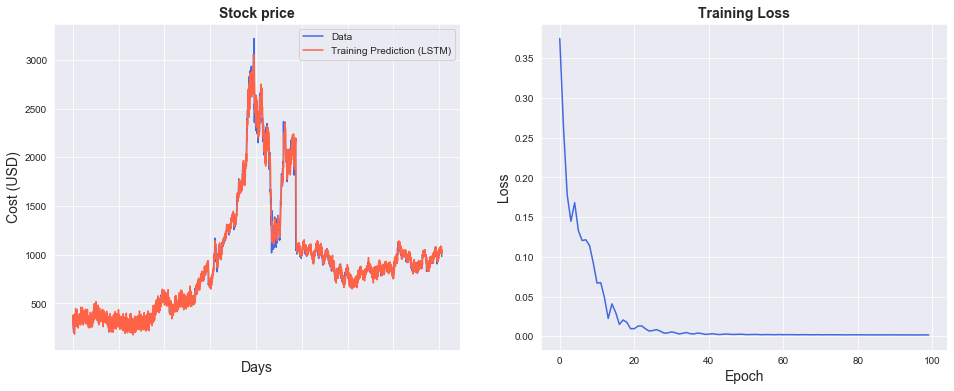

In [18]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=losses, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)


In [19]:

from sklearn.metrics import mean_squared_error
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 62.77 RMSE
Test Score: 55.76 RMSE


In [20]:
# Shift train predictions for plotting
# np.empty_like: returns a new array with the same shape and type as a given array
trainPredictPlot = np.empty_like(price)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[prediction_days:len(y_train_pred)+prediction_days,:] = y_train_pred

# Shift test predictions for plotting
testPredictPlot = np.empty_like(price)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(y_train_pred)+prediction_days-1:len(price)-1,:] =y_test_pred

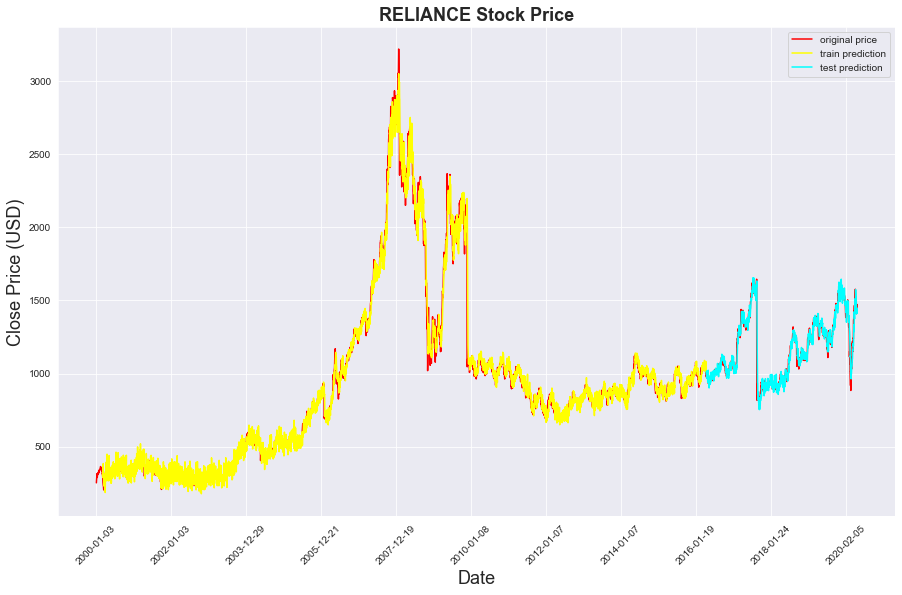

In [21]:

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(scaler.inverse_transform(price),label="original price",color='r')

plt.plot(trainPredictPlot,label='train prediction',color='yellow')

plt.plot(testPredictPlot,label='test prediction',color='cyan')
plt.legend()
plt.xticks(range(0,Data.shape[0],500),Data['Date'].loc[::500],rotation=45)
plt.title("RELIANCE Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()